In [483]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from caimcaim import CAIMD
from scipy.stats import pearsonr

## CAIBAL with Iris Dataset

In [484]:
#dataset
dataset = pd.read_csv('datasets/irisDataset.csv')
Validation = pd.DataFrame(dataset['Species'])
dataset_to_cluster = dataset.drop(['Id','Species'], axis=1)
dataset_to_cluster.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Clustering with K-means

In [485]:
k = 3
kmeans = KMeans(init='random', n_init= 20, n_clusters=k)
dataset_w_clusterAtt = dataset_to_cluster.copy()
dataset_w_clusterAtt['cluster'] = kmeans.fit_predict(dataset_to_cluster)
print(pd.value_counts(dataset_w_clusterAtt["cluster"]))

0    62
2    50
1    38
Name: cluster, dtype: int64


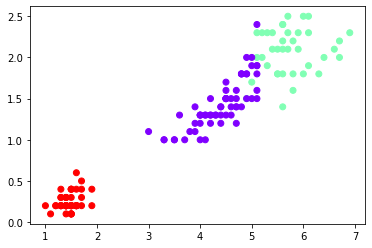

In [486]:
#ploting clusters
plt.scatter(dataset_w_clusterAtt['PetalLengthCm'],dataset_w_clusterAtt['PetalWidthCm'], c=dataset_w_clusterAtt['cluster'], cmap='rainbow')

## Discretizing with CAIM

In [487]:
numAtt = dataset_to_cluster.copy()
clusterAtt = dataset_w_clusterAtt['cluster']
caim = CAIMD()
dataset_disc = caim.fit_transform(numAtt, clusterAtt)
dataset_disc

Categorical []
# 0  GLOBAL CAIM  32.46822742474916
# 1  GLOBAL CAIM  28.82017543859649
# 2  GLOBAL CAIM  46.1764705882353
# 3  GLOBAL CAIM  44.22


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
145,1.0,0.0,2.0,1.0
146,1.0,0.0,1.0,1.0
147,1.0,0.0,2.0,1.0
148,1.0,1.0,2.0,1.0


In [488]:
#Finding cut points
disc_scheme = pd.DataFrame()
disc_scheme = caim.split_scheme
disc_scheme

{0: [4.3, 5.3, 7.9],
 1: [2.0, 3.3, 4.4],
 2: [1.0, 1.9, 5.2, 6.9],
 3: [0.1, 0.6, 2.5]}

## Showing information of each cluster

In [489]:
#Getting all entries from discretized dataset that belongs to same cluster
#change cluster number (line 4)
cluster = pd.DataFrame()
cluster = dataset_disc[dataset_w_clusterAtt['cluster'] == 2]

In [490]:
#Getting results by feature and it's values
all_results = []
result_table = pd.DataFrame();
for (colName, colData) in cluster.items():
    counter_table = pd.crosstab(index=cluster[colName], columns='count', rownames=['ranges'])
    counter_table = counter_table/counter_table.sum()
    all_results.append(counter_table)
result_table = pd.concat(all_results, names=['Feature','range'], keys=cluster.columns)

In [491]:
#Showing a result table with all information about cluster description
feature_name = result_table.index[0][0]
feature_index = 0
print('Cluster:')
for i_rt in range(result_table.index.size):
    if feature_name != result_table.index[i_rt][0]:
        feature_name = result_table.index[i_rt][0]
        feature_index+=1
    print(result_table.index[i_rt][0] + ': [' + str(disc_scheme[feature_index][int(result_table.index[i_rt][1])]),'-',str(disc_scheme[feature_index][int(result_table.index[i_rt][1])+1]) + '] - ',result_table.values[i_rt]*100)

Cluster:
SepalLengthCm: [4.3 - 5.3] -  [78.]
SepalLengthCm: [5.3 - 7.9] -  [22.]
SepalWidthCm: [2.0 - 3.3] -  [36.]
SepalWidthCm: [3.3 - 4.4] -  [64.]
PetalLengthCm: [1.0 - 1.9] -  [96.]
PetalLengthCm: [1.9 - 5.2] -  [4.]
PetalWidthCm: [0.1 - 0.6] -  [98.]
PetalWidthCm: [0.6 - 2.5] -  [2.]
